## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan. 

**Plan of actions:**
1. Examine the row data to identify potential issues
2. Deal with the issues encountered
3. Group the data
4. Calculate probabilites

### Open the data file and have a look at the general information

In [199]:
#importing the relevant modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
bank = pd.read_csv('/datasets/credit_scoring_eng.csv')
bank.info() #get information about each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [201]:
bank.describe(include='all')#get some statistic summary on each column of quantitative variables

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


#### Conclusion

Using the method .info() we got the concise summary of the dataframe `bank`. As we can see in the output, the summary tells us that we have a dataset with 12 columns, and 21525 rows (or non-null values). We can also see their data type. Our dataframe has mix of data, including integers, floats, and objects or with other words some of our data are numbers - they are quantitative variables and some consist of words - thus they are categorical variables. At first glance, we can see that two variables (`days_employed` and `total_income`) have less(19351) than the total number of obseravtions (21525). We will need to investigate this further and make decision what to do with those missing data. 

Using the method .decribe(), we got some basic statistics for our dataset. Something that appears odd is that in `days_employed` we have some negative values which can not be true. Also, the column `education` has 15 uniques values, while the `purpose` variable has 38 purposes stated.We will need to modify the data in those columns and orginize the different categories in smaller number of categories. 

### Data preprocessing

#### Processing missing values

In [202]:
#checking for missing values 
missing = bank.isnull().sum()*100/len(bank)
print(round(missing,2))

children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64


There is 10% of missing data from the columns `days_employed` and `total_income`. We can see if we can fill this values, as they are not too big proprotion, it should not affect the results to a large extent. 

In [203]:
bank['days_employed'].unique() #again results show negative numbers, which is uncorrect, 
#we can replace these values with positive values. 
#However for the purpose of the required tasks we will not use this variable

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

63046.49766147338
-1203.369528770489


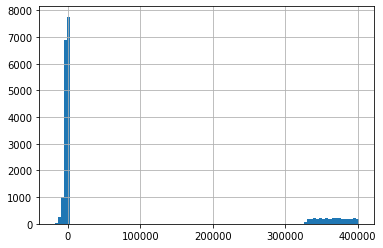

In [204]:
#creating a histogram to see the distrubution of the values in this variable
bank["days_employed"].hist(bins = 100) #the values are either negative, either too high
print(bank['days_employed'].mean())
print(bank['days_employed'].median()) #since there is a big difference between the mean and the median, we assume that there are outliers, so we will use the mean to fill in the missing data

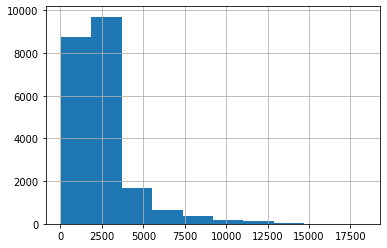

In [205]:
bank.loc[bank['days_employed'] > 0, 'days_employed'] = np.nan #replacing the very high values withn NaN
bank['days_employed'] = bank['days_employed'].abs() #we remove the negative sign from the negative values
bank['days_employed'].fillna(bank['days_employed'].mean(),inplace=True) #replacing the NaN with mean value, Changing the orgininal dataset
#checking how the distribution looks like after the changed we made
bank.days_employed.hist() #we are getting something that looks a more 'normal', altough the distribution is skewed 

In [206]:
#checking for the different information contained in a particular variable/column
bank['children'].unique() #results show that there is a negative number which is obvisoulsy a mistake because you can't have -1 children (it can be no children at all, but not -). Also there seem ot be an outlier, 20 children sounds a lot!
#We assume that 20 kids is a mistake, and someone accidentaly typed an extra 0. Will convert that to 2
bank.loc[bank['children'] == 20, 'children'] = 2
#We also assume that for -1 kid someone accidentaly typed an -sign. Will convert to 1 kid.
bank.loc[bank['children'] == -1, 'children'] = 1

26787.56835465867
23202.87


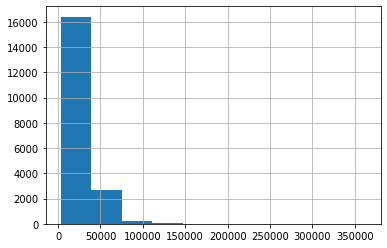

In [207]:
#graphically presenting the distrubtion of the income of the clients
bank.total_income.hist() 
print(bank['total_income'].mean())
print(bank['total_income'].median())

#we have skewed distribution, is it better to fill with median values 

In [208]:
#filling the missing data in the income variable with median value combination of two variables
bank['total_income'] = bank['total_income'].fillna(bank.groupby('income_type')['total_income'].transform('median'))
#filling the rest of missing data with median value 
bank_nomissing=bank.fillna(bank.median())

#### Conclusion

There are two columns with missing values, `days_employed` and `total_income` (both are numerical variables) each missing 2174 out of 21525 rows. The siginifcance ratio between 5% - 10% is considered not to be too much so therefore it was decided to fill them in (as the ratio is not big, the inserted values should not affect the analysis later on) and working with the dataset that has no missing values. After looking at mean and median, it was decided to use the median value, as there seem to be outliers dragging the mean upwards for the `days_employed` variable. The difference for the `total_income` is less, however still different, so we used the median to fill the missing values in the both columns. 

### Data type replacement

In [209]:
#Turning floats values into integers for the columns 'days_employed' and 'total_income'
bank_nomissing['days_employed'] = pd.to_numeric(bank_nomissing['days_employed'], errors='coerce').astype(int)
bank_nomissing['total_income'] = pd.to_numeric(bank_nomissing['total_income'], errors='coerce').astype(int)

#### Conclusion

The dataset had two columns with float values, which are not always the most appropriate type for doing some calculations and they take up more memory space. Therefore, using to_numeric() method, we replaced the float data type with the integer type. 

### Processing duplicates

In [210]:
bank['education'].unique() #this column needs some work. 
#There are different names used to decsribe the same category, which will create issues later on when grouping, categorizing and aggregating the data

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [211]:
#Looking for Duplicates by Hand with Case Sensitivity
#previoulsy we saw that there were not unifed apprach of how the data was recorded in the education column so we convereted all the entries in lower case
bank_nomissing['education'] = bank_nomissing['education'].str.lower() 

In [212]:
bank['purpose'].unique()#it looks like there are different wording used for the same purpose 
#for example 'to become educated' with 'profile education', 'to get a supplementary education'

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [213]:
# importing modules for stemming
from nltk.stem import SnowballStemmer 
english_stemmer = SnowballStemmer('english') 
from nltk.stem import WordNetLemmatizer
wordnet_lemma = WordNetLemmatizer()
from nltk.tokenize import word_tokenize

In [214]:
#creating a list with all unique entries from the purpose variable, and spliting them into single word
unique_purpose = list(bank_nomissing['purpose'].unique())
words = []
for sentence in unique_purpose:
    text_list=sentence.split()
    for x in text_list:
        if x not in words:
            words.append(x)
print(words)

['purchase', 'of', 'the', 'house', 'car', 'supplementary', 'education', 'to', 'have', 'a', 'wedding', 'housing', 'transactions', 'having', 'for', 'my', 'family', 'buy', 'real', 'estate', 'commercial', 'residential', 'construction', 'own', 'property', 'building', 'buying', 'second-hand', 'with', 'cars', 'become', 'educated', 'getting', 'an', 'ceremony', 'get', 'higher', 'profile', 'university', 'renting', 'out', 'renovation', 'going']


In [215]:
#exctracting the stem of each word
stems = []
for s in words:
    stem_each = english_stemmer.stem(s)
    stems.append(stem_each)
print(stems)

['purchas', 'of', 'the', 'hous', 'car', 'supplementari', 'educ', 'to', 'have', 'a', 'wed', 'hous', 'transact', 'have', 'for', 'my', 'famili', 'buy', 'real', 'estat', 'commerci', 'residenti', 'construct', 'own', 'properti', 'build', 'buy', 'second-hand', 'with', 'car', 'becom', 'educ', 'get', 'an', 'ceremoni', 'get', 'higher', 'profil', 'univers', 'rent', 'out', 'renov', 'go']


In [216]:
unique_stem_list = ['hous', 'car', 'educ', 'wed', 'estat', 'properti', 'ceremoni', 'univers','residenti']
credit_purpose_list = []
purpose_list = bank_nomissing.loc[:, 'purpose']

for rw_text in purpose_list:
    if 'hous' in rw_text or 'rent' in rw_text or 'estat' in rw_text or 'residenti' in rw_text or 'properti' in rw_text:
        credit_purpose_list.append('house')   
    elif 'car' in rw_text:
        credit_purpose_list.append('car')
        continue
    elif 'edu' in rw_text or 'univers' in rw_text:
        credit_purpose_list.append('education')
        continue
    elif 'wed' in rw_text or 'ceremoni' in rw_text:
        credit_purpose_list.append('ceremony')
    else:
        credit_purpose_list.append('other')
display(len(credit_purpose_list))
bank_nomissing['credit_type'] = credit_purpose_list
display(bank_nomissing['credit_type'].unique())

21525

array(['house', 'car', 'education', 'ceremony', 'other'], dtype=object)

In [217]:
#checking the duplicated in our data based on all the columns
bank_nomissing.duplicated().sum() 

71

In [218]:
#dropping the duplicates and keeping that new format to our dataset
bank_nomissing.drop_duplicates(subset=None, keep='first', inplace=True)

#### Conclusion

We identified 71 rows that were duplicated in the dataset, so we dropped them. However, before this, we changed the entries in the 'education' column to lower case so the program can easily check whether they are duplicates or no. We also used stemming to create a new column in the dataset which uses ony one word to describe the purpose of the loan. 

### CATEGORIZING DATA

In [219]:
#categorizing the data by the number of children
def has_children(children):  
    if children == 0:
        return 'No'
    return 'Yes' 

In [220]:
#testing whether the function works
has_children(4)

'Yes'

In [221]:
#creating a separate column for children categories and record the values the function returns in its cells.
bank_nomissing['having_children'] = bank_nomissing['children'].apply(has_children)

In [222]:
#checking the quantiles for the income variable, so we can use this info to split the income data into categories
bank_nomissing.total_income.quantile([.25, .5,.75])

0.25    17219.5
0.50    22815.0
0.75    31331.0
Name: total_income, dtype: float64

In [223]:
#creating income_categories so we can compare the probability for each group (rather than each unique income level)
bank_nomissing['income_category'] = pd.cut(bank_nomissing["total_income"], bins=[0,17219.5, 22815.0, 31331.0, np.inf])

#### Conclusion

In order to answer the main questions, we created categories for the variables of interest, namely `children` and `total_income`. The other variables of interest are already grouped in categories, as they are categorical variables such as the newly created `credit_type`, and the existing column `marital_status`. 

### Check which category is more likely to repay the loan

- Is there a relation between having kids and repaying a loan on time?

In [224]:
#finding the mean values for each group
bank_nomissing.groupby('having_children').apply(lambda x: x["debt"].mean())

having_children
No     0.075438
Yes    0.092082
dtype: float64

In [225]:
#finding the mean values for each group by creating a pivot table
credit_scoring_pivot = pd.pivot_table(bank_nomissing, 
                                      index=['having_children'],  
                                      values=["debt"], aggfunc=[np.mean]).reset_index()
credit_scoring_pivot

,having_children,mean
,,debt
0,No,0.075438
1,Yes,0.092082


In [226]:
#extracting only the data we need
kids_dic = bank_nomissing.groupby(['having_children'])['debt']
value_cou_kids = pd.DataFrame(kids_dic.value_counts())
print(value_cou_kids)

                       debt
having_children debt       
No              0     13028
                1      1063
Yes             0      6685
                1       678


In [227]:
debt_nokids_probability = 13086 / (1063 + 13086)
print("The probaility of someone who have no kids, to have no dept is {:.2%}".format(debt_nokids_probability))

The probaility of someone who have no kids, to have no dept is 92.49%


In [228]:
debt_kids_probability = 6698 / (678 + 6698)
print("The probaility of someone who have kids, to have no dept is {:.2%}".format(debt_kids_probability))

The probaility of someone who have kids, to have no dept is 90.81%


#### Conclusion

The analysis showed that there is no large difference between people with kids and people without kids, in the probability of having paid their loan. However, customers with kids are by about 2% more likely to pay they loan.

- Is there a relation between marital status and repaying a loan on time?

In [229]:
#finding the mean values
bank_nomissing.groupby('family_status').apply(lambda x: x["debt"].mean())

family_status
civil partnership    0.093471
divorced             0.071130
married              0.075452
unmarried            0.097509
widow / widower      0.065693
dtype: float64

In [231]:
#extracting only the data we need
marrital_dic = bank_nomissing.groupby(['family_status'])['debt']
value_cou_marr = pd.DataFrame(marrital_dic.value_counts())
print(value_cou_marr)

                         debt
family_status     debt       
civil partnership 0      3763
                  1       388
divorced          0      1110
                  1        85
married           0     11408
                  1       931
unmarried         0      2536
                  1       274
widow / widower   0       896
                  1        63


In [232]:
probability_nodebt_partnership = 3789 / (3789 + 388)
print('The probaility of someone who is in civil partnership to have no dept is {:.2%}'.format(probability_nodebt_partnership))

The probaility of someone who is in civil partnership to have no dept is 90.71%


In [233]:
probability_nodebt_divorced = 1110 / (1110 + 85)
print('The probaility of someone who is divorced, to have no dept is {:.2%}'.format(probability_nodebt_divorced))

The probaility of someone who is divorced, to have no dept is 92.89%


In [234]:
probability_nodebt_married = 11449 / (11449 + 931)
print('The probaility of someone who is married to have no dept is {:.2%}'.format(probability_nodebt_married))

The probaility of someone who is married to have no dept is 92.48%


In [235]:
probability_nodebt_unmarried = 2539 / (2539 + 274)
print('The probaility of someone who is unmarried, to have no dept is {:.2%}'.format(probability_nodebt_unmarried))

The probaility of someone who is unmarried, to have no dept is 90.26%


In [236]:
probability_nodebt_widow = 897 / (897 + 63)
print('The probaility of someone who is widow, to have no dept is {:.2%}'.format(probability_nodebt_widow))

The probaility of someone who is widow, to have no dept is 93.44%


#### Conclusion

The probaility of someone to has paid their loan varies across the different group of people when split by their marrital status, alhtough by not a huge amount.  The highest probability of having no debt is for widowed people (93.44%), while the lowest for  those who are unmarried people (90.26%)

- Is there a relation between income level and repaying a loan on time?

In [237]:
#finding the mean values
bank_nomissing.groupby('income_category').apply(lambda x: x["debt"].mean())

income_category
(0.0, 17219.5]        0.079605
(17219.5, 22815.0]    0.088139
(22815.0, 31331.0]    0.085382
(31331.0, inf]        0.071415
dtype: float64

In [238]:
#excatricting the data we need
income_d = bank_nomissing.groupby(['income_category'])['debt']
value_income = pd.DataFrame(income_d.value_counts())
print(value_income)

                         debt
income_category    debt      
(0.0, 17219.5]     0     4937
                   1      427
(17219.5, 22815.0] 0     4997
                   1      483
(22815.0, 31331.0] 0     4799
                   1      448
(31331.0, inf]     0     4980
                   1      383


In [239]:
nodebt_low_income = 4937 / (4937 + 427)
print('The probaility of someone who is earning the lowest income, to have no dept is {:.2%}'.format(nodebt_low_income))

The probaility of someone who is earning the lowest income, to have no dept is 92.04%


In [240]:
nodebt_medium_income = 4024 / (4024 + 385)
print('The probaility of someone who earning lower than median, to have no dept is {:.2%}'.format(nodebt_medium_income))

The probaility of someone who earning lower than median, to have no dept is 91.27%


In [241]:
nodebt_high_income = 5770 / (5770 + 546)
print('The probaility of someone who is belongs to the high income category, to have no dept is {:.2%}'.format(nodebt_high_income))

The probaility of someone who is belongs to the high income category, to have no dept is 91.36%


In [242]:
nodebt_highest_income = 4982 / (4982 + 383)
print('The probaility of someone who is earning the highest income, to have no dept is {:.2%}'.format(nodebt_highest_income))

The probaility of someone who is earning the highest income, to have no dept is 92.86%


#### Conclusion

People who earn the higest income, have also the largest probaility of having paid the loan (92.86%)

- How do different loan purposes affect on-time repayment of the loan?

In [243]:
#calculatiing the means
bank_nomissing.groupby('credit_type').apply(lambda x: x["debt"].mean())

credit_type
car          0.093590
ceremony     0.080034
education    0.092200
house        0.072165
other        0.073132
dtype: float64

In [244]:
#extracting only the data we need
purpose_dic = bank_nomissing.groupby(['credit_type'])['debt']
value_cou_purpose = pd.DataFrame(purpose_dic.value_counts())
print(value_cou_purpose)

                  debt
credit_type debt      
car         0     3903
            1      403
ceremony    0     2138
            1      186
education   0     3643
            1      370
house       0     8280
            1      644
other       0     1749
            1      138


In [245]:
car_purpose = 3912 / (3912 + 403)
print('The probability of someone who is borrowing for car, to have no dept is {:.2%}'.format(car_purpose))

The probability of someone who is borrowing for car, to have no dept is 90.66%


In [246]:
ceremony_purpose = 2162 / (2162 + 186)
print('The probability of someone who is borrowing for ceremony, to have no dept is {:.2%}'.format(ceremony_purpose))

The probability of someone who is borrowing for ceremony, to have no dept is 92.08%


In [247]:
education_purpose = 3652 / (3652 + 370)
print('The probability of someone who is borrowing for housing, to have no dept is {:.2%}'.format(education_purpose))

The probability of someone who is borrowing for housing, to have no dept is 90.80%


In [248]:
house_purpose = 8307 / (8307 + 644)
print('The probability of someone who is borrowing for housing, to have no dept is {:.2%}'.format(house_purpose))

The probability of someone who is borrowing for housing, to have no dept is 92.81%


In [249]:
other_purpose = 1751 / (1751 + 138)
print('The probaility of someone who is borrowing for other purposes, to have no dept is {:.2%}'.format(other_purpose))

The probaility of someone who is borrowing for other purposes, to have no dept is 92.69%


#### Conclusion

Those who borrow for house, ceremony or other purposes, have the lowest probability to have debt.

In [250]:
credit_scoring_pivot = pd.pivot_table(bank_nomissing, 
                                      index=["credit_type", "having_children", 'family_status'], 
                                      columns=['income_category'], 
                                      values=["debt"], aggfunc=[np.mean])
credit_scoring_pivot

mean  \
                                                        debt   
income_category                               (0.0, 17219.5]   
credit_type having_children family_status                      
car         No              civil partnership       0.106667   
                            divorced                0.104167   
                            married                 0.079208   
                            unmarried               0.109244   
                            widow / widower         0.080000   
            Yes             civil partnership       0.161290   
                            divorced                0.062500   
                            married                 0.127572   
                            unmarried               0.000000   
                            widow / widower         0.000000   
ceremony    No              civil partnership       0.066339   
            Yes             civil partnership       0.138462   
education   No              civil partnership       0.135593   
                            divorced                0.065217   
                            married                 0.071090   
                            unmarried               0.121739   
                            widow / widower         0.105263   
            Yes             civil partnership       0.136364   
                            divorced                0.136364   
                            married                 0.084388   
                            unmarried               0.027778   
                            widow / widower         0.000000   
house       No              civil partnership       0.056000   
                            divorced                0.021978   
                            married                 0.060175   
                            unmarried               0.073643   
                            widow / widower         0.023622   
            Yes             civil partnership       0.065574   
                            divorced                0.095238   
                            married                 0.083012   
                            unmarried               0.109091   
                            widow / widower         0.000000   
other       No              civil partnership       0.111111   
                            divorced                0.125000   
                            married                 0.091892   
                            unmarried               0.041667   
                            widow / widower         0.000000   
            Yes             civil partnership       0.058824   
                            divorced                0.153846   
                            married                 0.073171   
                            unmarried               0.222222   
                            widow / widower         0.000000   

                                                                  \
                                                                   
income_category                               (17219.5, 22815.0]   
credit_type having_children family_status                          
car         No              civil partnership           0.112500   
                            divorced                    0.072727   
                            married                     0.059908   
                            unmarried                   0.137255   
                            widow / widower             0.084746   
            Yes             civil partnership           0.095238   
                            divorced                    0.038462   
                            married                     0.102273   
                            unmarried                   0.157895   
                            widow / widower             0.250000   
ceremony    No              civil partnership           0.103896   
            Yes             civil partnership           0.078431   
education   No         

### Step 4. General conclusion

**Brief overview of the work done**: Using the skills learnt in the data pre-processing chapter, we completed the bank loan related project in order to find out if customer’s socio-economic characteristics have impact on the likelihood that a customer will pay on time their loan. In order to come to such conclusion, we first examined the dataset to identify any potential issues with the raw data. Some of the problems we encountered were odd/suspicious values, some missing values and some duplicate data. These problems with the raw data may have occured during recording the data. So we tried to correct the mistakes and to fill in the missing values. We also dealt with the categorical values using stemming, as there were some repetitve and not consistent data entires, which may have had impact on the accuracy of the analysis. After cleaning the data, they were ready to be grouped for the purpose of the later analysis. 

**Main findings**: The main analysis consisted od calculation of the probability of different cohorts of people to have paid the loan on time (or with other words to have no debt). The results from such analysis showed that customers who are the most likely to pay their loan are those with no children, widowed, those who have higher income, and clients that borrow for house, ceremony and other purposes. However these calculated differences were not very large, and we also need to take into account that this is some basic exploratory analysis only and that does not look at statistical significance of the differences between the probabilites.

**Recommendations**: for future, it will be good that there are pre-defined sub-categories in the purpose column. This way the clients can select their answers from the given options, rather than typing random words, that lead to incosistent entries. Also, it would have been good if the person who records the data, uses the describe method to see for any odd values. Then they can check the original source and see whether there was an issue with how the data were transferred. Reccomendation for the Bank is that the categories who are most likely to pay their loan on time, are better clients and therefore the Bank should pay more attention to them, in order to attract and reatain them by for example offering better loan conditions. 